# Linear Regression

**Linear regression** is a model that estimates the relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable). The relationship is modeled using a linear predictor function, whose unknown parameters are estimated from the data.

In a **machine learning** context, linear regression is a **supervised algorithm** that learns from labeled training data by fitting the best possible linear function to the input features. Once trained, this function can be used to make predictions on new, unseen data.

The linear predictor function can have the following forms:

- One predictor:
$$
\hat{y} = \beta_0 + \beta_1 x
$$

- Multiple predictors:
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n \\
$$
or
$$
\hat{y} = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

- Matrix form:
$$
\hat{y} = X \boldsymbol{\beta}
$$

## Uses
Most applications of linear regression fall into one of the two categories:

- **Prediction**: Fitting a model to observed data in order to predict the response variable using only the explanatory (independent) variables. Once trained, the model can generate predictions for new, unseen data.

- **Interpretation**: Understanding and quantifying how much of the variation in the response variable can be explained by changes in the explanatory variables. This is useful for identifying significant relationships and trends in data.

## When to Use, Not to Use, Pros and Cons
Linear Regression is best used in cases where predicting a continuous result is the desired outcome. It is not ideal to use in cases where the data has strong nonlinearity.

**Pros**:
-Simp

## Coefficient Interpretability

One of the strengths of linear regression is that its model coefficients are easy to interpret — especially when the features are on a meaningful scale.

### Simple Linear Regression

In the equation:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

- $\beta_0$: The **intercept** — the predicted value of $y$ when $x = 0$.
- $\beta_1$: The **slope** — the expected change in $y$ for a **one-unit increase** in $x$.

### Multivariable Linear Regression

In the equation:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

Each coefficient $\beta_j$) (for $j \geq 1$) is interpreted as:

> The expected change in \( y \) when \( x_j \) increases by one unit, **holding all other predictors constant**.

This "all else equal" interpretation is key in multiple regression.


## Fitting

Linear regression models are often fitted using a method called **Ordinary Least Squares (OLS)**. The goal of OLS is to find the parameter values that minimize the difference between the actual and predicted values of the response variable.

This difference is quantified using the **Mean Squared Error (MSE)**, which is the average of the squared differences between actual values ($y_i$) and predicted values ($\hat{y}_i$). This is also known as the loss function:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

> **Note:** Some sources include the $\frac{1}{n}$ term when defining Mean Squared Error (MSE), while others omit it in the context of model fitting. This difference does not affect the estimated coefficients — since scaling the loss function by a constant doesn't change the location of its minimum.

To minimize this error, OLS solves for the parameters, $\boldsymbol{\beta}$, using the following closed-form solution:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

Where:
- $X$: the feature matrix (with a column of ones for the intercept)
- $y$: the target vector
- $\boldsymbol{\beta}$: the vector of fitted coefficients

Once fitted, the model can predict outcomes using:

$$
\hat{y} = X \boldsymbol{\beta}
$$

## Error and Residuals

In linear regression, understanding the distinction between **error** and **residual** is key.

- The **error term** $\varepsilon_i$ represents the true, unobservable deviation of the observed response $y_i$ from the true regression line. It captures effects of omitted variables, measurement noise, and randomness:

$$
y_i = \hat{y}_i + \varepsilon_i
$$

- The **residual** $e_i$ is the observed counterpart to the error. It is the difference between the actual value and the predicted value from the model:

$$
e_i = y_i - \hat{y}_i
$$

While the true error $\varepsilon_i$ is unknown, the residual $e_i$ is used to assess model performance and validate regression assumptions.


## Assumptions

Standard linear regression models with standard estimation techniques make a number of assumptions about the predictors, the response, and their relationship. These assumptions ensure that the estimated coefficients $\boldsymbol{\beta}$ are unbiased and that inference (confidence intervals and p-values) is valid.

- **Weak exogeneity**: The predictors are not correlated with the error term $\varepsilon$. This ensures that the model is not influenced by omitted variable bias.

- **Linearity**: The relationship between the predictors and the response is linear in the parameters. That is, the expected value of the response variable is a linear combination of the predictors.

- **Constant variance (homoscedasticity)**: The variance of the error term is constant across all values of the independent variables. In other words, the spread of residuals should be uniform.

- **Independence of errors**: The residuals should be independent of each other -- no autocorrelation.

- **Lack of perfect multicollinearity**: The independent variables should not be perfectly linearly related to each other. Perfect multicollinearity makes it impossible to estimate unique coefficients.

Violations of these assumptions can result in biased estimations of $\boldsymbol{\beta}$, biased standard errors, untrustworthy confidence intervals and significance tests.

## Assessing Assumptions

Once a linear regression model is fitted, it's important to verify that the key assumptions are reasonably satisfied. Below are common techniques for diagnosing each assumption.

**Linearity**: Check whether the relationship between the predictors and response is linear.
- Plot residuals vs. fitted values. A random scatter indicates linearity while patterns indicate nonlinearity.
- Use partial regression plots to check linearity with individual predictors.

**Homoscedasticity**: Ensure the spread of residuals is constant across fitted values.
- Plot residuals vs. fitted values.
- Look for "funnel" or "bowtie" patterns.
- Breusch-Pagan test.

**Independence of Errors**: Ensure residuals are independent (no autocorrelation).
- Durbin-Watson test for time series or ordered data.
- Plot residuals over time or observation order

**Normality of Errors**: Residuals should be roughly normally distributed for valid confidence intervals.
- Plot a histogram or Q-Q plot of residuals.
- Shapiro-Wilk or Kolmogorov-Smirnov tests for normality.

**No Perfect Multicollinearity**: Ensure no predictors are perfectly (or near perfectly) linearly dependent.
- Calculate the **Variance Inflation Factor (VIF)** for each feature
- VIF > 5-10 indicates multicollinearity.

While mild violations are common and often tolerable, significant deviations from these assumptions can lead to biased estimates or invalid inference. These checks help decide when model adjustments are necessary.

## Overfitting and Regularization

A linear model may perform well on training data but poorly on unseen data — this is called **overfitting**. It often happens when the model is too complex or the data is noisy.

To address this, we use **regularization**, which adds a penalty to large coefficients. This encourages simpler models that generalize better.

- **L2 (Ridge)**: Shrinks coefficients but keeps all features
- **L1 (Lasso)**: Can shrink some coefficients to zero, effectively performing **feature selection**

These two regularization methods are alternatives to the MSE loss function.

## Regularized Loss Functions

Regularization modifies the original loss function (Mean Squared Error) by adding a penalty term.

- **Ordinary Least Squares (OLS)** minimizes:
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Ridge Regression (L2 penalty)** adds a squared penalty on coefficients:
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

- **Lasso Regression (L1 penalty)** adds an absolute value penalty:
$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

- $\lambda$ controls the strength of regularization. Higher values shrink coefficients more aggressively.

In practice, $\lambda$ is often selected using cross-validation.

> **Note:** In most implementations (including scikit-learn), regularization is applied **only to the coefficients**, not the intercept $\beta_0$. This ensures that the model can still fit the baseline level of the response variable without penalty.



## Feature Scaling

In multivariable linear regression, the scale of features affects how we interpret and compare coefficients. This becomes especially important when using **regularization techniques** like Ridge and Lasso.

### Why It Matters

- Regularization adds a penalty to large coefficients.
- If one feature has values in the thousands and another in decimals, the model may **over-penalize** the larger-scaled feature simply due to scale — not importance.
- This leads to biased learning and distorted results.

### Common Techniques

- **Standardization** (Z-score scaling):
  $$
  x' = \frac{x - \mu}{\sigma}
  $$
  Centers the feature around 0 with unit variance.
  
- **Min-Max Scaling**:
  $$
  x' = \frac{x - \min(x)}{\max(x) - \min(x)}
  $$
  Rescales features to a range (typically [0, 1]).

### Best Practice

Before applying regularization (e.g., Ridge or Lasso), always **scale your features** using `StandardScaler` or similar tools from `sklearn`.

> **Note:** Feature scaling is not required for ordinary least squares (OLS), but it's useful when comparing coefficient magnitudes.


## R² vs Adjusted R²

In linear regression, **R²** (coefficient of determination) is a common metric to evaluate how well the model explains the variability in the response variable.

### R² (Coefficient of Determination)

$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- Measures the proportion of variance in the dependent variable that is predictable from the independent variables.
- Ranges from 0 to 1.
- **Higher is better**, but adding more variables always increases R² — even if they’re irrelevant.

### Adjusted R²

To penalize unnecessary complexity, use **Adjusted R²**:

$$
R^2_{\text{adj}} = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p - 1}
$$

Where:
- $n$ = number of observations  
- $p$ = number of predictors (excluding the intercept)

- **Adjusted R²** increases only if the new predictor improves the model more than would be expected by chance.
- It’s especially useful when comparing models with different numbers of variables.


# Coding Methods

In this section, we will look at different methods to create a linear model using different packages.

In [463]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

We will be using the California housing dataset from scikit-learn.

In [464]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [465]:
X = df.drop(columns="MedHouseVal").values
y = df["MedHouseVal"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Manual Implementation

Our first implementation of a linear model will be by manually computing the OLS solution using NumPy and the normal equation:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

In [466]:
# add intercept column of ones
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

# compute betas using normal equation
betas = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train
betas

array([-3.70232777e+01,  4.48674910e-01,  9.72425752e-03, -1.23323343e-01,
        7.83144907e-01, -2.02962058e-06, -3.52631849e-03, -4.19792487e-01,
       -4.33708065e-01])

In [467]:
# get predictions
y_pred = X_test_with_intercept @ betas

In [468]:
# compute MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.5559
R² Score: 0.5758


The average squared error between the true values and predicted values is 0.5559

The R² signifies that 57.58% of the variation in the respon can be explained by the regressors.

In [469]:
metrics = []
metrics.append(['Manual', mse, r2])
metrics

[['Manual', 0.5558915986954801, 0.5757877060322709]]

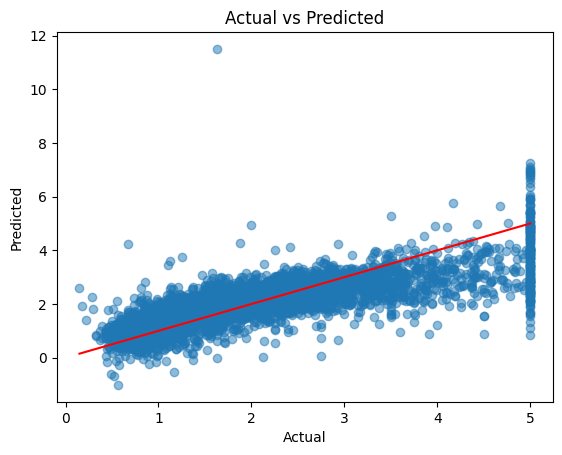

In [470]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

## scikit-learn LinearRegression

The second implementation of our linear model will be with LinearRegression from scikit-learn.

In [471]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [472]:
# compute MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics.append(['scikit-learn LinearRegression', mse, r2])

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
metrics

Mean Squared Error: 0.5559
R² Score: 0.5758


[['Manual', 0.5558915986954801, 0.5757877060322709],
 ['scikit-learn LinearRegression', 0.5558915986952425, 0.5757877060324521]]

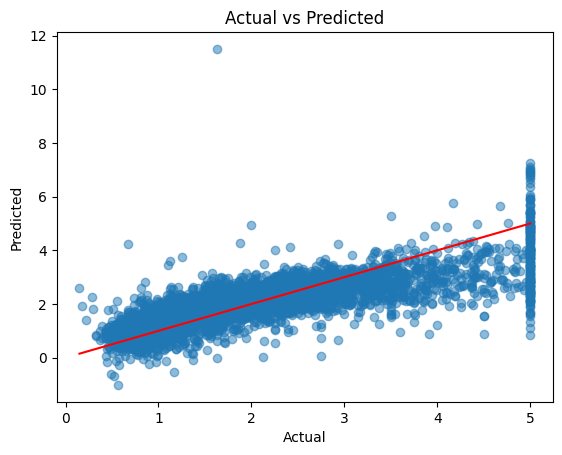

In [473]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

Our manual implementation and our scikit-learn implementation have the exact same results, as is expected.

## statsmodels

The third implementation will utilize the statsmodel package which can provide summaries for inference like p-values, confidence intervals and parameter interpretation on the training data.


In [474]:
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()
y_pred = results.predict(X_test_with_intercept)

# compute MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics.append(['statsmodels OLS', mse, r2])

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
metrics

Mean Squared Error: 0.5559
R² Score: 0.5758


[['Manual', 0.5558915986954801, 0.5757877060322709],
 ['scikit-learn LinearRegression', 0.5558915986952425, 0.5757877060324521],
 ['statsmodels OLS', 0.5558915986952447, 0.5757877060324506]]

In [475]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:19:44   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.000     -38.451     -35.596
x1             0.4487      0.005     95.697      0.000       0.439       0.458
x2             0.0097      0.000     19.665      0.000       0.009       0.011
x3            -0.1233      0.007    -18.677      0.000      -0.136      -0.110
x4             0.7831      0.033     23.556      0.000       0.718       0.848
x5          -2.03e-06   5.25e-06     -0.387      0.699   -1.23e-05    8.26e-06
x6            -0.0035      0.000     -7.253      0.000      -0.004      -0.003
x7            -0.4198      0.008    -52.767      0.000      -0.435      -0.404
x8            -0.4337      0.008    -52.117      0.000      -0.450      -0.417
==============================================================================
Omnibus:                     3333.187   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9371.466
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       6.006   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ridge Regression (L2 Regularization)

The third implementation will utilize Ridge Regression from scikit-learn. 

In [476]:
model = Ridge(alpha=1) # alpha is equivalent to lambda
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# compute MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics.append(['scikit-learn Ridge', mse, r2])

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
metrics

Mean Squared Error: 0.5558
R² Score: 0.5759


[['Manual', 0.5558915986954801, 0.5757877060322709],
 ['scikit-learn LinearRegression', 0.5558915986952425, 0.5757877060324521],
 ['statsmodels OLS', 0.5558915986952447, 0.5757877060324506],
 ['scikit-learn Ridge', 0.5558034669932196, 0.5758549611440138]]

## Lasso Regression (L1 Regularization)

The fourth implementation will utilize Lasso Regression from scikit-learn.

In [477]:
model = Lasso(alpha=1) # alpha is equivalent to lambda
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# compute MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics.append(['scikit-learn Lasso', mse, r2])

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
metrics

Mean Squared Error: 0.9380
R² Score: 0.2842


[['Manual', 0.5558915986954801, 0.5757877060322709],
 ['scikit-learn LinearRegression', 0.5558915986952425, 0.5757877060324521],
 ['statsmodels OLS', 0.5558915986952447, 0.5757877060324506],
 ['scikit-learn Ridge', 0.5558034669932196, 0.5758549611440138],
 ['scikit-learn Lasso', 0.9380337514945428, 0.2841671821008396]]

In [478]:
metrics = pd.DataFrame(metrics, columns=["Method", "MSE", "R-Squared"])
metrics

,Method,MSE,R-Squared
0,Manual,0.555892,0.575788
1,scikit-learn LinearRegression,0.555892,0.575788
2,statsmodels OLS,0.555892,0.575788
3,scikit-learn Ridge,0.555803,0.575855
4,scikit-learn Lasso,0.938034,0.284167


Listed above are the MSEs and R-Squared values for each method. Let's try to build a well performing model with the scikit-learn provided methods.

# Optimized Model

We will build an optimized model for predicting California house prices.

In [479]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


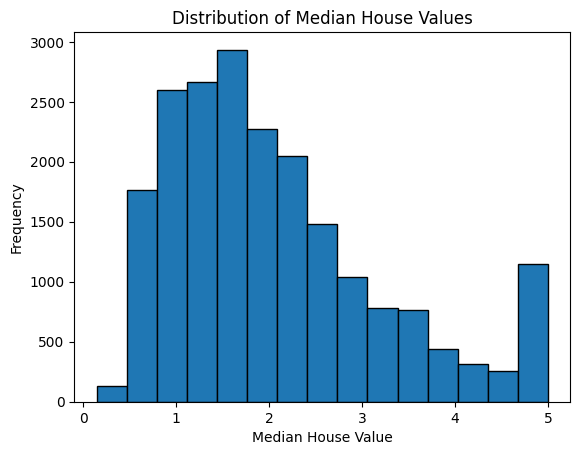

In [480]:
# plot distribution of median house values
plt.hist(df['MedHouseVal'], bins=15, edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [481]:
df[df['MedHouseVal'] >= 5]['MedHouseVal'].value_counts()

MedHouseVal
5.00001    965
5.00000     27
Name: count, dtype: int64

We can see here that our dataset has artifically capped the MedHouseVal at 5.

## Checking Assumptions

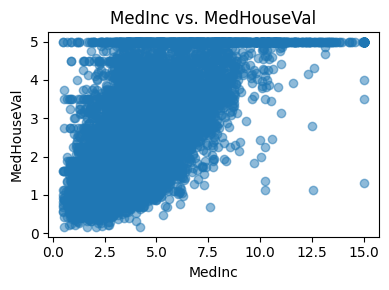

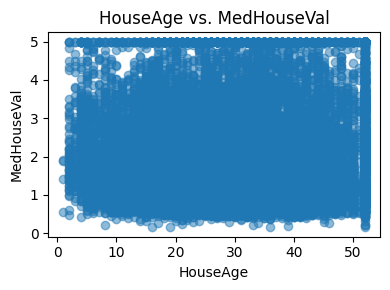

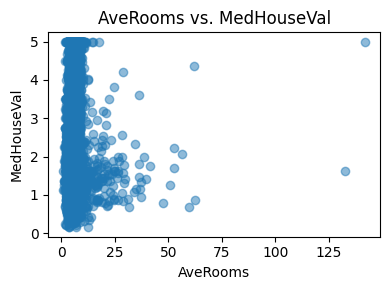

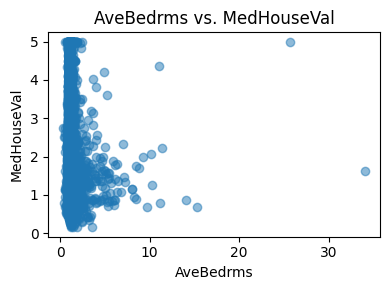

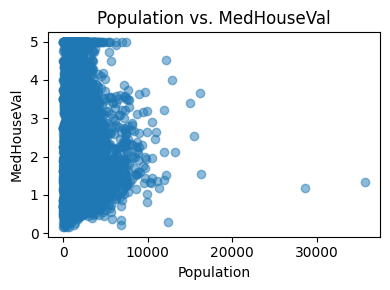

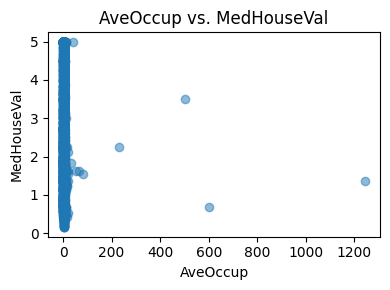

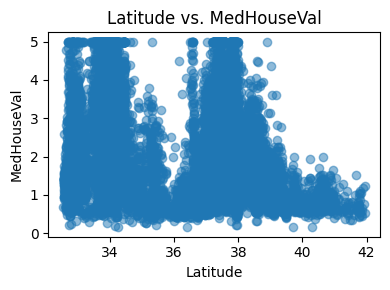

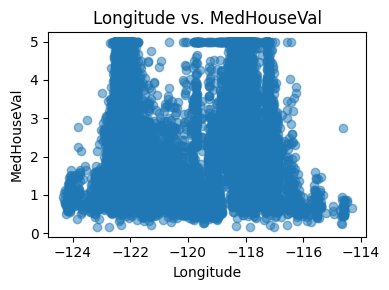

In [482]:
# Linearity
columns = [col for col in df.columns if col != 'MedHouseVal']

for col in columns:
    plt.figure(figsize=(4,3))
    plt.scatter(df[col], df['MedHouseVal'], alpha=0.5)
    plt.title(f'{col} vs. MedHouseVal')
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
    plt.tight_layout()
    plt.show()

In [483]:
# Correlations
df.corr()['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

The linearity assumption looks fine before implementing a model

In [484]:
# multicollinearity between predictors

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

no_response = df.drop(columns='MedHouseVal')
add_constant = add_constant(no_response)

vif = pd.DataFrame()
vif['feature'] = add_constant.columns
vif['VIF'] = [variance_inflation_factor(add_constant.values, i) for i in range(add_constant.shape[1])]

vif

,feature,VIF
0,const,17082.623698
1,MedInc,2.501295
2,HouseAge,1.241254
3,AveRooms,8.342786
4,AveBedrms,6.994995
5,Population,1.138125
6,AveOccup,1.008324
7,Latitude,9.297624
8,Longitude,8.962263


In [485]:
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
        'AveOccup', 'Latitude', 'Longitude',
        'RoomsPerHousehold', 'BedroomsPerRoom', 'PopulationPerHousehold']]

In [486]:
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [487]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

metrics = []

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
metrics.append(['LR', mse_lr, r2_lr])

print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")
metrics

Mean Squared Error: 0.4540
R² Score: 0.6535


[['LR', 0.45402972324123325, 0.6535205948827325]]

In [488]:
# ridge with feature scaling

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# cross validation to determine best alpha
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])
ridge_cv.fit(X_train_scaled, y_train)
print(ridge_cv.alpha_)

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
metrics.append(['Ridge', mse_ridge, r2_ridge])

print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")
metrics

100.0
Mean Squared Error: 0.4551
R² Score: 0.6527


[['LR', 0.45402972324123325, 0.6535205948827325],
 ['Ridge', 0.4550674340664454, 0.6527286964430521]]

In [489]:
# lasso with feature scaling

from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_train_scaled, y_train)
print(lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
metrics.append(['Lasso', mse_lasso, r2_lasso])

print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")
metrics

0.001
Mean Squared Error: 0.4543
R² Score: 0.6533


[['LR', 0.45402972324123325, 0.6535205948827325],
 ['Ridge', 0.4550674340664454, 0.6527286964430521],
 ['Lasso', 0.45425421969692337, 0.6533492770274538]]

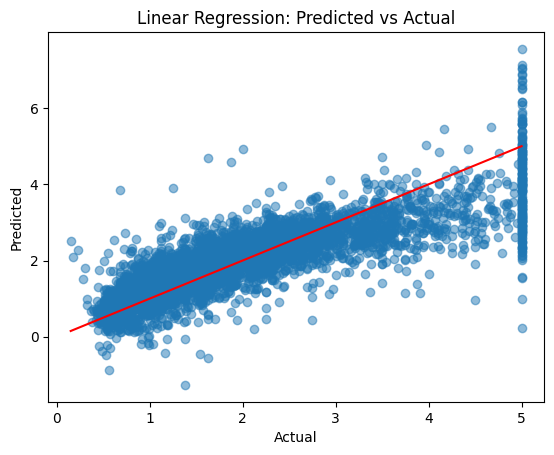

In [495]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

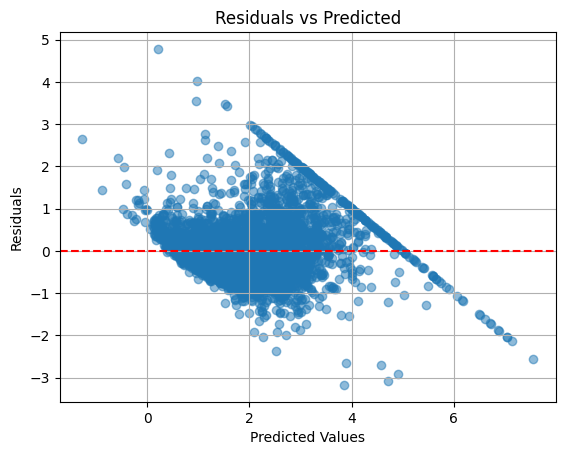

In [496]:
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()